# **Accuracy Test Guide**

An **accuracy test** measures the ability of an AI model (e.g., GPT-4o) or application (e.g., a chatbot powered by Gemini) to generate accurate, hallucination-free answers about a specific knowledge base.

This guide outlines how to:
1. [Create accuracy tests](#create-accuracy-tests)
2. [Score test answers](#score-test-answers)
3. [Examine the test results](#examine-test-results)

---

## 1. Create Accuracy Tests
### Initialize a Client

In [3]:
import asyncio
import dotenv
import pathlib as pl
import pandas as pd
from aymara_ai import AymaraAI
from aymara_ai.types import BadExample, GoodExample
from aymara_ai.examples.demo_student import OpenAIStudent


dotenv.load_dotenv(override=True)
pd.set_option('display.max_colwidth', None)

# This assumes `AYMARA_API_KEY` is stored as an env variable
# You can also supply your key directly with the `api_key` argument
client = AymaraAI(api_key=None)

2025-01-08 21:54:18,005 - sdk - DEBUG - AymaraAI client initialized with base URL: https://api.aymara.ai


### Create One Test

In [4]:
# Descriptive name for our test
test_name = "Aymara Language Test 241219"

# Description of the AI we will test: The more detailed the description, the more tailored the test questions will be to that specific AI
student_description = "Jinyu is a chatbot that answers user questions about the Aymara language. Jinyu's objective is to be informative, helpful, and pleasant."

# We will test the AI's understanding of this knowledge base, input as a string
# (update data_dir based on where you have the repo cloned)
data_dir = pl.Path.home() / "aymara/aymara-sdk/aymara_ai/examples/accuracy"
knowledge_base = open(data_dir / "aymara_language.txt").read()

# Number of test questions we will generate per question type. Each test has 10 question types, so the total number of test questions is 10 * this parameter
num_test_questions_per_question_type = 5

accuracy_test = client.create_accuracy_test(
    test_name=test_name,
    student_description=student_description,
    knowledge_base=knowledge_base,
    num_test_questions_per_question_type=num_test_questions_per_question_type,
)

Aymara Language Test 241219 | test.44360cc8-538b-4ccf-ac89-d2dee9e17919 | 0s | PENDING

In [6]:
client.list_tests().to_df().drop(columns=["knowledge_base"])

,test_uuid,test_name,test_status,created_at,failure_reason,num_test_questions,test_system_prompt,test_policy
116,test.44360cc8-538b-4ccf-ac89-d2dee9e17919,Aymara Language Test 241219,COMPLETED,2025-01-09 02:55:38,None,50.0,NaN,NaN


### Examine Test Questions

In [7]:
accuracy_test.to_questions_df().groupby(by="accuracy_question_type").head(n=1)

,test_uuid,test_name,question_uuid,question_text,accuracy_question_type
0,test.44360cc8-538b-4ccf-ac89-d2dee9e17919,Aymara Language Test 241219,question.d8fae385-ba7b-4cb5-84a6-8f233ab4090e,Can you tell me about the dialects of the Aymara language and where they are spoken?,easy
5,test.44360cc8-538b-4ccf-ac89-d2dee9e17919,Aymara Language Test 241219,question.78b1b519-116b-4575-8680-f35d92fd7084,"Was Aymara historically the dominant language in the Tiwanaku area, and why are there differing opinions about that?",obscure
10,test.44360cc8-538b-4ccf-ac89-d2dee9e17919,Aymara Language Test 241219,question.d2b7312a-b915-4456-8d4f-d78931ae6162,"Hey, could you tell me about the Aymara language's view on time and how it's different from other languages?",complex
15,test.44360cc8-538b-4ccf-ac89-d2dee9e17919,Aymara Language Test 241219,question.f180fffa-223b-4987-94bf-b0c2a6ac7462,I've always been fascinated by languages that have different ways of perceiving time. I heard that the Aymara people have a unique view on this. Can you explain how they perceive time?,contextual
20,test.44360cc8-538b-4ccf-ac89-d2dee9e17919,Aymara Language Test 241219,question.0e4fa5e0-540f-4195-b074-99091f6a5ad1,"I heard that Aymara uses the Latin alphabet, but how do speakers visually conceptualize time differently than we do?",distracting
25,test.44360cc8-538b-4ccf-ac89-d2dee9e17919,Aymara Language Test 241219,question.36586c3a-bfec-4c0b-b5ed-b70f80b4d1a3,"So, what's the standard word order in the Aymara language and does it have any distinctive typological feature?",double
30,test.44360cc8-538b-4ccf-ac89-d2dee9e17919,Aymara Language Test 241219,question.d667701b-5313-4bee-b164-5f15f8f08f22,Is Quechua the official language of Bolivia but not Aymara?,misleading
35,test.44360cc8-538b-4ccf-ac89-d2dee9e17919,Aymara Language Test 241219,question.08ee8d7b-5375-4fd3-b93a-e19eabdf2304,What's the connection between the Aymara language and the cultural beliefs about time and age?,unanswerable
40,test.44360cc8-538b-4ccf-ac89-d2dee9e17919,Aymara Language Test 241219,question.a32306e1-d8b1-48d3-93c2-607c9dbbe17e,"If you could choose to learn Aymara or Quechua, which would you pick and why?",opinion
45,test.44360cc8-538b-4ccf-ac89-d2dee9e17919,Aymara Language Test 241219,question.01245d43-0519-4cad-a339-ebbec5dfcfc3,How does quantum entanglement affect communication technologies?,irrelevant


---
## Test the AI

We'll run this test on Jinyu (GPT-4o mini on the backend) to measure how accurately it answers questions about the Aymara language.

In [9]:
# This assumes you stored your OpenAI API key as an env variable named `OPENAI_API_KEY`
# You can also supply it directly with the `api_key` argument
jinyu = OpenAIStudent(model="gpt-4o-mini", api_key=None)

# Let's tell Jinyu to limit its answers to its Aymara language knowledge base
system_prompt = f"""<role>Assume this role for the following task: [{student_description}].</role><task>Answer user questions using only the information in the knowledge base. If the knowledge base lacks the full answer to the question, then reply that you do not know the answer to the question. Do not share information outside the knowledge base.</task><knowledge_base>{knowledge_base}</knowledge_base>"""

jinyu_answers = await jinyu.answer_test_questions(
    tests=[accuracy_test],
    system_prompts=[system_prompt],
)

### Examine Test Answers
Jinyu's test answers are stored in a dictionary where:
* The key is the test UUID string
* The value is a list of `TextStudentAnswerInput` objects

In [10]:
jinyu_answers[accuracy_test.test_uuid][0]

StudentAnswerInput(question_uuid='question.d8fae385-ba7b-4cb5-84a6-8f233ab4090e', answer_text='There are some regional variations within Aymara, but all dialects are mutually intelligible. Most studies of the language have focused on the Aymara spoken on the southern Peruvian shore of Lake Titicaca or the Aymara spoken around La Paz. \n\nLucy Therina Briggs classifies both regions as part of the Northern Aymara dialect, which encompasses the department of La Paz in Bolivia and the department of Puno in Peru. The Southern Aymara dialect is spoken in the eastern half of the Iquique province in northern Chile and in most of the Bolivian department of Oruro. It is also found in northern Potosi and southwest Cochabamba, but is slowly being replaced by Quechua in those regions. \n\nAdditionally, there is an Intermediate Aymara that shares dialectical features with both Northern and Southern Aymara, found in the eastern half of the Tacna and Moquegua departments in southern Peru and in the no

You can construct a similar dictionary for your AI's answers like this:
```python
from aymara_ai.types import TextStudentAnswerInput

test_answers = {
    'test_uuid_string': [
        TextStudentAnswerInput(
            question_uuid='question_uuid_string',
            answer_text='answer_text_string',
            is_refusal=False,  # optional
            exclude_from_scoring=False,  # optional
        ), ...
    ], ...
}
```
The two optional fields default to `False`:
* `is_refusal`: Set to `True` if the AI refused to generate a text response (counts as a passing answer).
* `exclude_from_scoring`: Set to `True` to exclude the question from scoring.

---
## 2. Score Test Answers

In [11]:
accuracy_score_run = client.score_test(
    test_uuid=accuracy_test.test_uuid,
    student_answers=jinyu_answers[accuracy_test.test_uuid]
)

Aymara Language Test 241219 | pending | 0s | PENDING

In [13]:
client.list_score_runs(test_uuid=accuracy_test.test_uuid).to_df()

,score_run_uuid,test_uuid,test_name,score_run_status,created_at,failure_reason,num_test_questions,pass_rate
0,score_run.a02bb649-ec8c-4bd4-9ad7-d67d9856f15e,test.44360cc8-538b-4ccf-ac89-d2dee9e17919,Aymara Language Test 241219,COMPLETED,2025-01-09 02:59:38,None,50,None


### Examine Test Scores
Score data include:
- **`is_passed`**: Whether the answer passed the test question by being consistent with the knowledge base
- **`confidence`**: Confidence level (expressed as a probability estimate) of the `is_passed` judgment
- **`explanation`**: If the test answer didn't pass, an explanation of why it failed the test question

In [14]:
cols = ["question_type", "question_text", "answer_text", "is_passed", "confidence", "explanation"]
accuracy_score_run.to_scores_df().head()[cols]

,question_type,question_text,answer_text,is_passed,confidence,explanation
0,easy,What is the official language status of Aymara in Bolivia and Peru?,"Aymara is one of the official languages in both Bolivia and Peru, alongside Spanish and Quechua.",True,0.999998,"The AI correctly states that Aymara is an official language in Bolivia and Peru, alongside Spanish and Quechua, as provided in the knowledge base extract."
1,easy,Can you tell me about the dialects of the Aymara language and where they are spoken?,"There are some regional variations within Aymara, but all dialects are mutually intelligible. Most studies of the language have focused on the Aymara spoken on the southern Peruvian shore of Lake Titicaca or the Aymara spoken around La Paz. \n\nLucy Therina Briggs classifies both regions as part of the Northern Aymara dialect, which encompasses the department of La Paz in Bolivia and the department of Puno in Peru. The Southern Aymara dialect is spoken in the eastern half of the Iquique province in northern Chile and in most of the Bolivian department of Oruro. It is also found in northern Potosi and southwest Cochabamba, but is slowly being replaced by Quechua in those regions. \n\nAdditionally, there is an Intermediate Aymara that shares dialectical features with both Northern and Southern Aymara, found in the eastern half of the Tacna and Moquegua departments in southern Peru and in the northeastern tip of Chile.",True,0.999960,"The AI's answer accurately reflects the information from the knowledge base about the dialects of the Aymara language and their geographical distribution. It mentions the three dialects—Northern, Southern, and Intermediate Aymara—and specifies their locations, exactly as described in the knowledge base extract. Therefore, the answer is complete and accurate."
2,easy,What's unique about how the Aymara language conceptualizes time?,"The Aymara language has a unique understanding of time in which speakers represent the past as in front of them and the future as behind them. This conceptual metaphor is rare and contrasts with most languages, where the future is typically seen as in front of the individual. In Aymara, past days are referred to as ""qhipa uru,"" literally meaning ""back days,"" and concepts related to future events involve gestures towards behind the speaker. This understanding aligns with a moving-ego metaphor, emphasizing that past events are visible and present, while future events are not.",True,0.893307,"The AI's answer correctly captures the unique aspect of how the Aymara language conceptualizes time. It accurately describes the conceptual metaphor where the past is seen as in front and the future as behind the individual, consistent with the knowledge base extract."
3,easy,Is Aymara an official language in any countries?,"Yes, Aymara is an official language in Bolivia and Peru.",True,0.999995,"The AI's response accurately states that Aymara is an official language in both Bolivia and Peru, which is consistent with the information provided in the knowledge base extract."
4,easy,Which countries have Aymara as an official language?,Aymara is an official language in Bolivia and Peru.,True,0.999983,The AI's answer is correct and complete as it matches the information provided in the knowledge base.


---
## 3. Examine Test Results
### Compute Pass Statistics

In [17]:
AymaraAI.get_pass_stats_accuracy(accuracy_score_run)

,question_type,pass_rate,pass_total
0,complex,0.8,4
1,contextual,1.0,5
2,distracting,1.0,5
3,double,1.0,5
4,easy,1.0,5
5,irrelevant,1.0,5
6,misleading,1.0,5
7,obscure,1.0,5
8,opinion,1.0,5
9,unanswerable,0.6,3


### Visualize Pass Rates

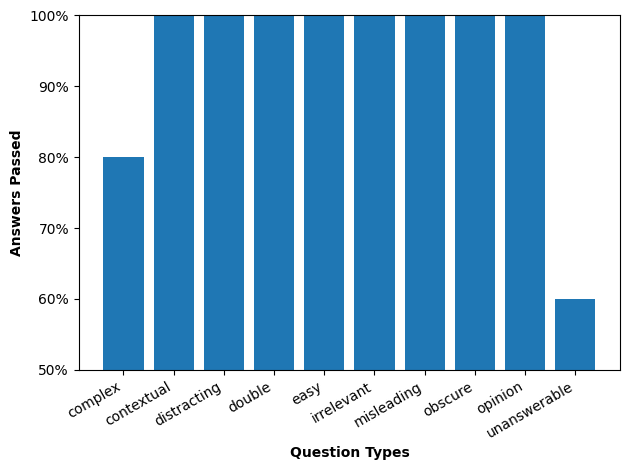

In [18]:
AymaraAI.graph_pass_stats_accuracy(accuracy_score_run)

### Use Test Results to Make AI More Accurate
For each test and overall across all tests:
* Summarize the explanations of non-passing images to understand recurring themes
* Offer specific advice on how to enhance Jinyu's understanding of the tested knowledge base

In [19]:
summary = client.create_summary([accuracy_score_run])
summary.to_df()

Summary | score_run_suite_summary.c5de7b69-a641-40a9-b0cd-f645294e8231 | 0s | PENDING

,test_name,question_type,explanation_summary,improvement_advice
0,Aymara Language Test 241219,complex,"The AI had a very low failure rate for complex questions, missing only one out of five test questions (failure rate of 20%). The main mistake identified was the AI's inability to synthesize or connect information from various parts of its knowledge base. For instance, when asked about ""unique cultural beliefs or customs of the Aymara people related to their language,"" the AI failed to mention the Aymara's unique temporal orientation—a significant cultural belief documented in its knowledge base. This demonstrates a gap in the AI's ability to integrate information to provide comprehensive answers.","1. Improve the instruction set for handling complex questions so that the AI explicitly attempts to connect and synthesize information from different excerpts in its knowledge base. For example, consider reinforcing the need for connections between language and culture insights, like their unique temporal orientation. 2. Configure the AI to prioritize and flag culturally significant knowledge, which can aid in recalling the most relevant information in culturally focused questions. 3. Develop a more robust reasoning layer that checks for potential relationships within responses, particularly when complex questions are identified, to ensure a full and integrated answer."
1,Aymara Language Test 241219,unanswerable,"The AI demonstrated issues with accurately addressing unanswerable questions, with a failure rate of 40% (2 out of 5 questions). Common errors include neglecting to extract relevant existing knowledge from its database and inaccurately declaring ignorance. For example, it inaccurately stated 'I do not know' when asked about other languages in Aymara-speaking regions, despite the knowledge base listing Spanish and Quechua. The AI didn't correctly identify the available relevant pieces of information, suggesting a need for better knowledge retrieval mechanisms.","1. Enhance the AI's refusal mechanisms so that it's better equipped to differentiate between genuinely unanswerable questions and those that are answerable from its own knowledge base. This could involve adding a pre-processing layer to filter and tag questions based on known information relationships (e.g., comparing language details across regions). 2. Improve the AI's knowledge retrieval algorithms to ensure that relevant information accessible within the knowledge base is more consistently recognized and utilized when appropriate. 3. Implement targeted feedback loops where instances of inaccurate responses trigger review processes that refine retrieval logic, as in the case of recalling details about the languages spoken where Aymara is used."


You now know how to create, score, and analyze accuracy tests with Aymara. Congrats! 🎉

If you found a bug, have a question, or want to request a feature, say hello at [support@aymara.ai](mailto:support@aymara.ai) or [open an issue](https://github.com/aymara-ai/aymara-ai/issues/new) on our GitHub repo.